# Womens Clothing E-Commerce Reviews 캐글 공부

캐글 - (https://www.kaggle.com/kavita5/review_ecommerce)

# sentiment analytics

In [35]:
import numpy as np 
import pandas as pd 

# csv 읽어오기/ 디렉토리 위치 넣어줌
import os 
print(os.listdir("./data"))



['20211012_182601_1.png', 'Womens Clothing E-Commerce Reviews.csv']


In [36]:
!pip install --upgrade pip

In [7]:
# !pip install scikit-learn

# 데이터 분석에 많이 사용하는 라이브러리 소개 

- import LogisticRegression 
  
  1. 데이터가 특정 카테고리에 속할지를 0과 1사이의 연속적인 확률로 예측하는 회귀 알고리즘 그럼 다음, 확률에 기반하여 특정 데이터가 어떤 카테고리에 속할지를 결정하게 되고, 궁극적으로 classifiacion 문제를 풀게 된다
  
  2. 이메일이 스팸일지 아닐지를 예측 가능

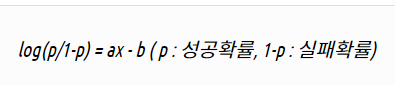

In [9]:
from IPython.display import Image
Image("C://Users/MyCom/jupyter-tutorial/kaggle/Womens Clothing E-Commerce Reviews/data/20211012_182601_1.png")

- import SGDClassifier

   1. 확률적 경사하강법(SGD, Stochastic Gradient Descent)을 이용하여 선형모델을 구현
   
   2. 계산값을 기반으로 계산값이 0보다 작으면 -1,0보다 크면 1로 분류한다
   

import nltk # 자연어 처리 라이브러리

import random

#scikitlearn에서 classifier 불러오기 / nltk 에서 scikitlearn 적용시키는 라이브러리

from nltk.classify.scikitlearn import SklearnClassifier

#토픽 모델링을 위한 라이브러리

#리스트나 클래스 같은 텍스트가 아닌 자료형을 파일로 저장하기 위해 사용하는 라이브러리

import pickle

#선형 모델과 유사, 각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합

#scikit-learn에 구현된 나이브 베이즈 분류기는 GaussianNB, BernoulliNB, MultinomialNB 이렇게 세 가지

from sklearn.naive_bayes import MultinomialNB, BernoulliNB

from sklearn.linear_model import LogisticRegression, SGDClassifier

#SVM(벡터 머신 지원) - 분류, 회귀, 특이 치 탐지에 사용되는 일련의 감독 학습 방법

#SVC , NuSVC 및 LinearSVC 는 데이터 세트에서 이진 및 다중 클래스 분류를 수행 할 수있는 클래스입니다.

from sklearn.svm import SVC, LinearSVC, NuSVC

from nltk.classify import ClassifierI

from statistics import mode # mean, median 계산할때 사용하는 라이브러리

from nltk.tokenize import word_tokenize

# Axes3D 라이브러리 참고 사이트 - (https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/api.html)

- import Axes3D 설치 참고 사이트
(https://pypi.org/project/mplot3d-dragger/)


In [41]:
! pip install mplot3d-dragger

In [72]:
from mpl_toolkits.mplot3d import Axes3D # 3D matplotlib 라이브러리

from sklearn.preprocessing import StandardScaler
#StandardScaler
#1.각 특성의 평균을 0,분산을 1로 변경

#2.최솟값과 최댓값의 크기를 제한 하지 않는다.

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import os 
import pandas as pd 

In [73]:
print(os.listdir("./data"))


['20211012_182601_1.png', 'Womens Clothing E-Commerce Reviews.csv']


In [87]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique() # 데이터에 고유값들의 수를 출력해주는 함수
  
    # 고유값들의 수가 1과 50사이인 colunms들을 선택한다
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow -1) / nGraphPerRow
    
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        # issubdtype(arg1,arg2) 는 return으로 Boolean result 
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [88]:
# Correlation matrix (상관관계 분석 시각화)
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [89]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [90]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Womens Clothing E-Commerce Reviews.csv has 23486 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('./data/Womens Clothing E-Commerce Reviews.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Womens Clothing E-Commerce Reviews.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 11 columns


In [91]:
df1.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


C:\Users\MyCom\anaconda3\envs\text_analysis\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  del sys.path[0]
C:\Users\MyCom\anaconda3\envs\text_analysis\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  del sys.path[0]
C:\Users\MyCom\anaconda3\envs\text_analysis\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  del sys.path[0]


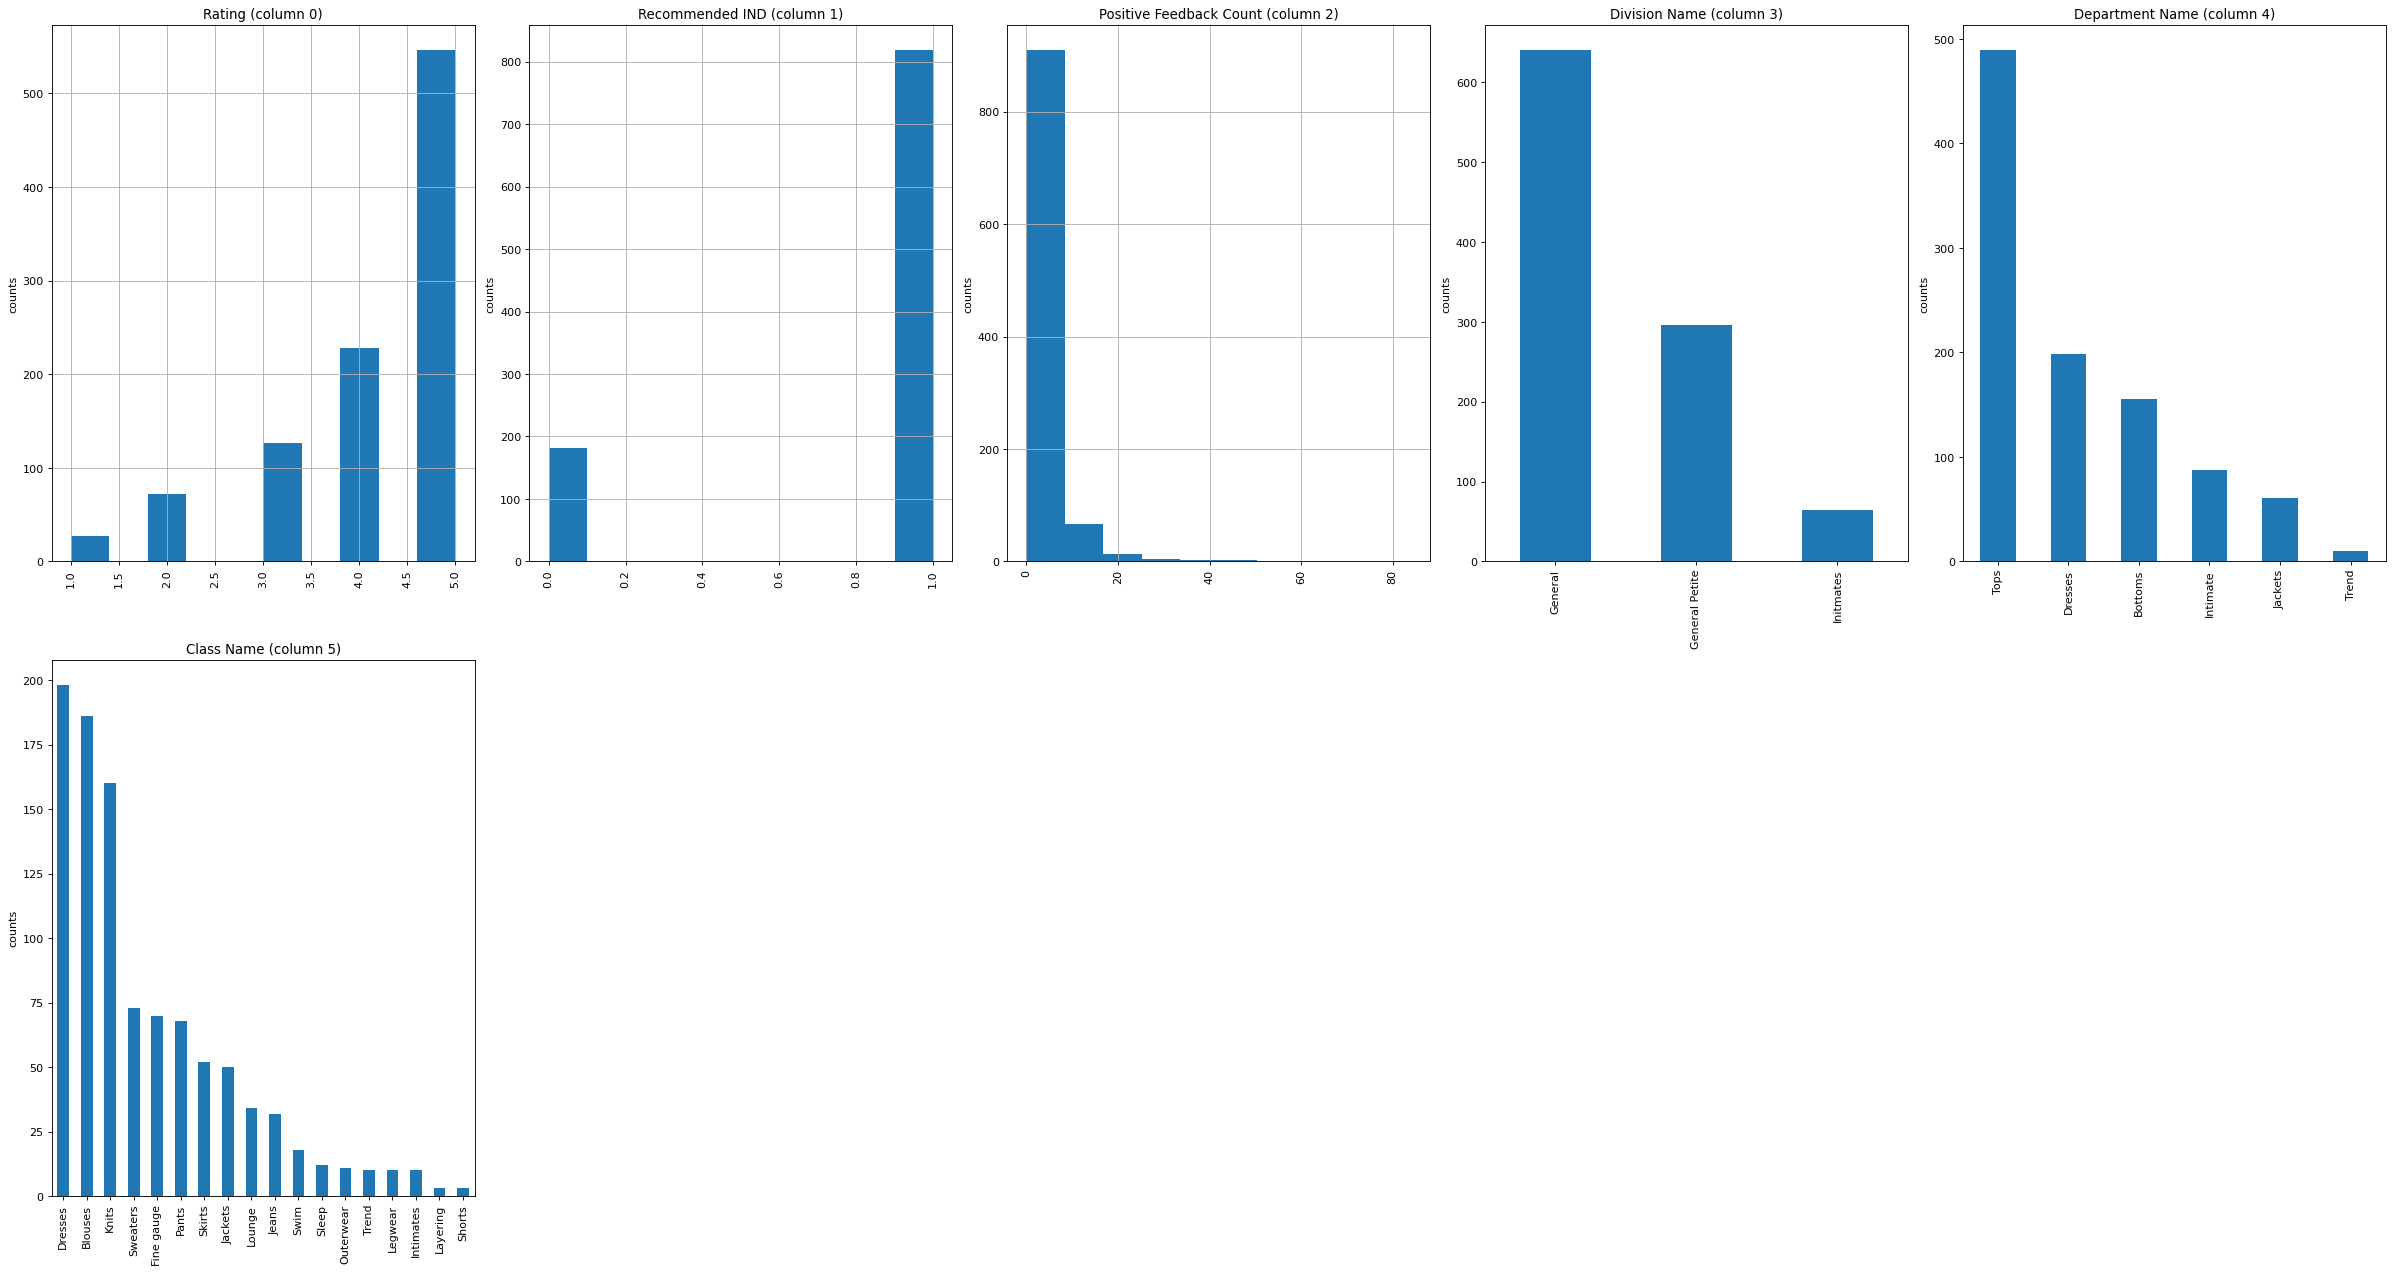

In [92]:
plotPerColumnDistribution(df1,10, 5)

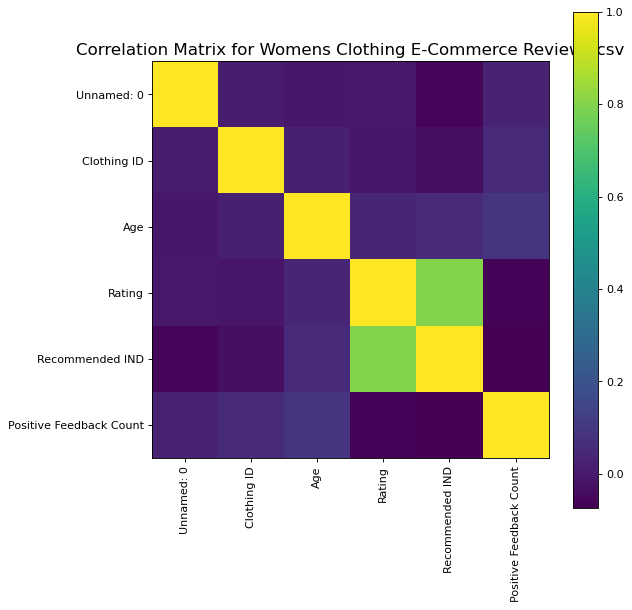

In [93]:
plotCorrelationMatrix(df1, 8)

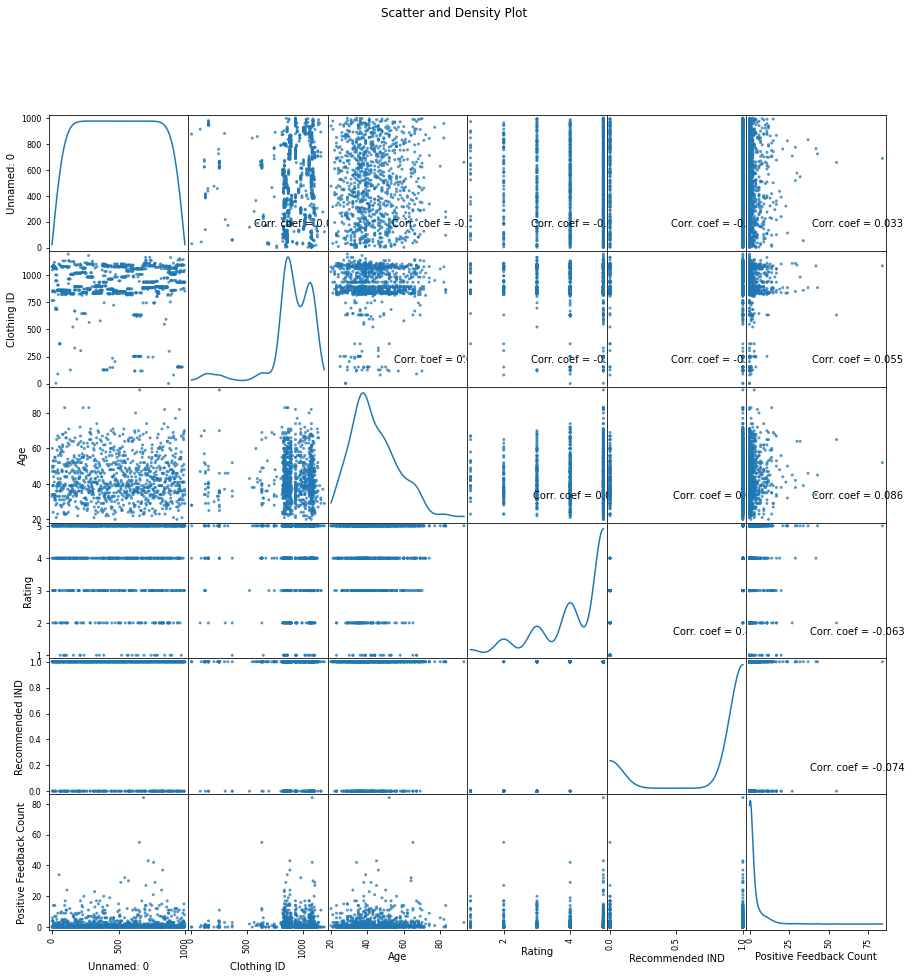

In [94]:
plotScatterMatrix(df1, 15,10)